# Compare the gain of PMTs before and after potting 

Used during the sorting of PMTs for Mini-EUSO and EUSO-SPB during Spring 2016. Before/after potting => introduction of kapton cables and cross-talk (fixed for Mini-EUSO).

In [35]:
%%javascript
//disable autoscrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [28]:
%matplotlib inline

from compare import *

from matplotlib import pyplot as plt
from matplotlib.pyplot import ion
import seaborn as sns

import numpy as np
import fnmatch
import os

Define the location of data files and load the ASIC setup.

setup.txt file format:  
PMT#  - pedestal DAC - correction factor - k - ASIC 

Some explanation:
* correction factor - different resistor configuration on test board  
* k - S-curve taken at 1000 V or 1100 V
* ASIC - char defining which ASIC is associated with this PMT ('A' - 'E')


In [29]:
setup=np.genfromtxt('setup.dat', dtype= None)
unpot_data = 'unpotted_data/'
pot_data = 'potted_data/PMT/'
output_dir = 'plots/gain_comparison_final/'

Run and plot the gain comparison over all available PMT files 

Completed PMT 1461
Completed PMT 1507
Completed PMT 1508
Completed PMT 1509
Completed PMT 1567
Completed PMT 1753
Completed PMT 1762
Completed PMT 1764
Completed PMT 1765
Completed PMT 1769
Completed PMT 1792
Completed PMT 1804
Completed PMT 1811
Completed PMT 1827


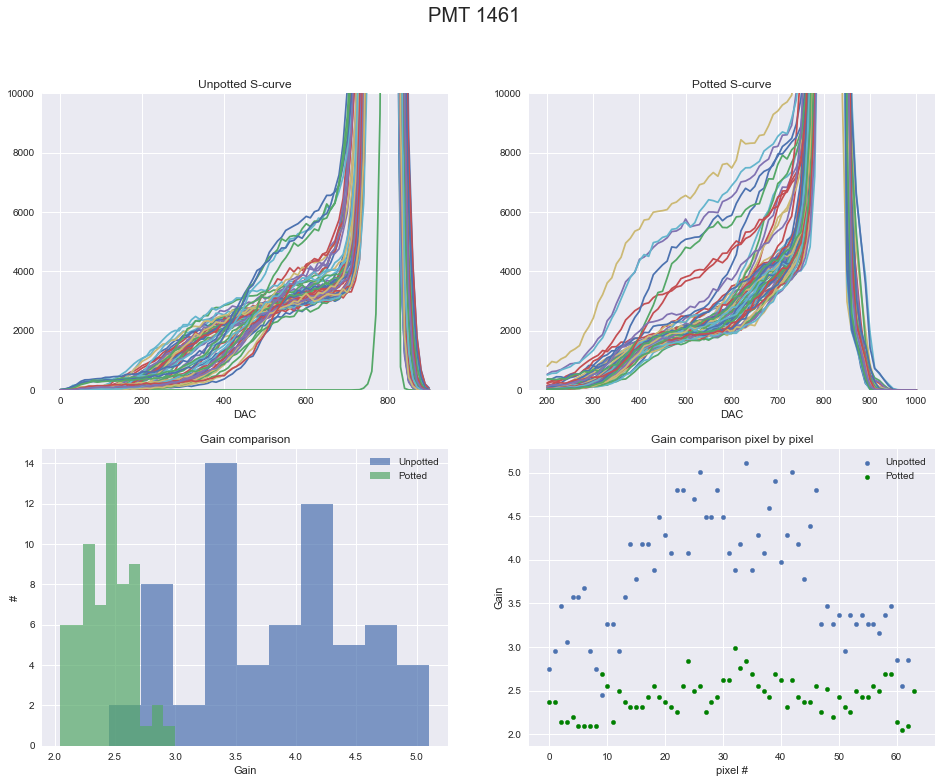

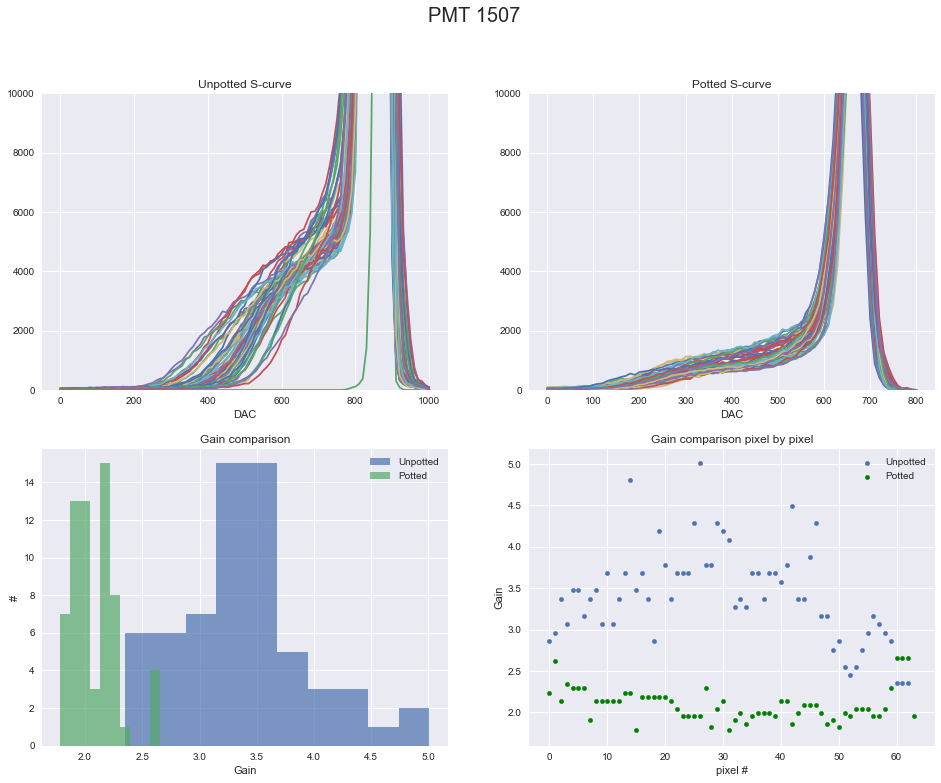

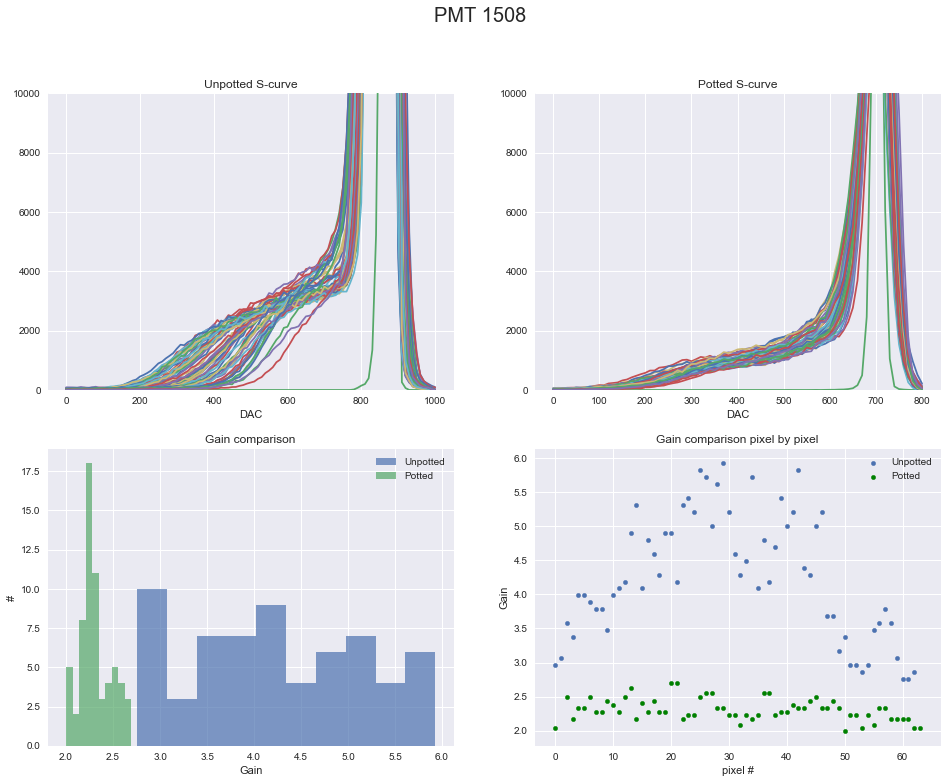

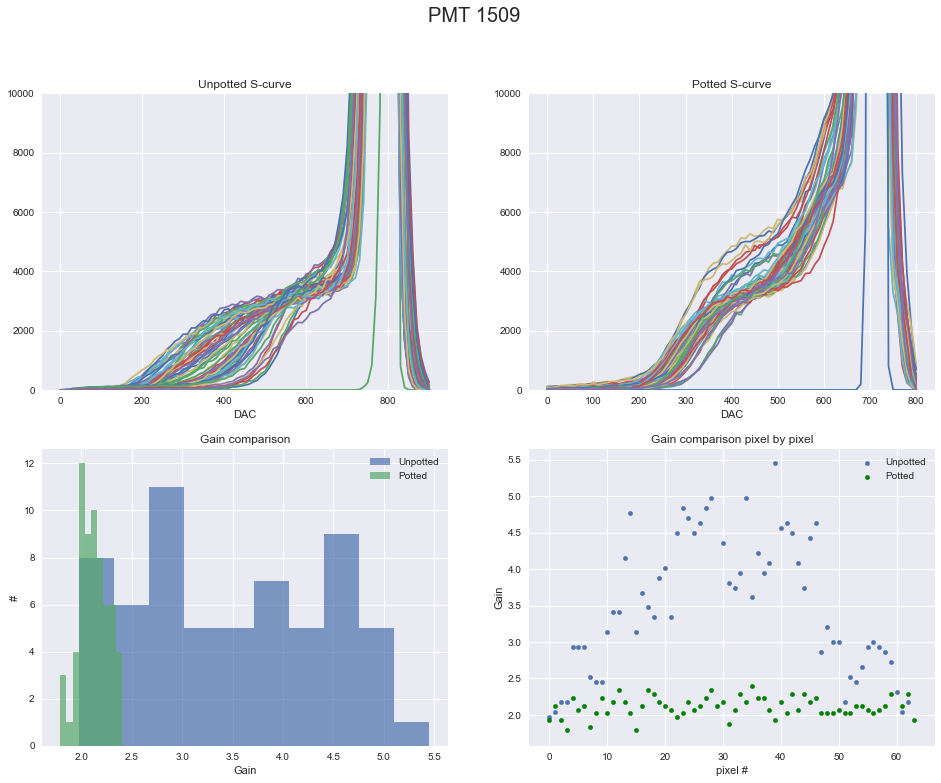

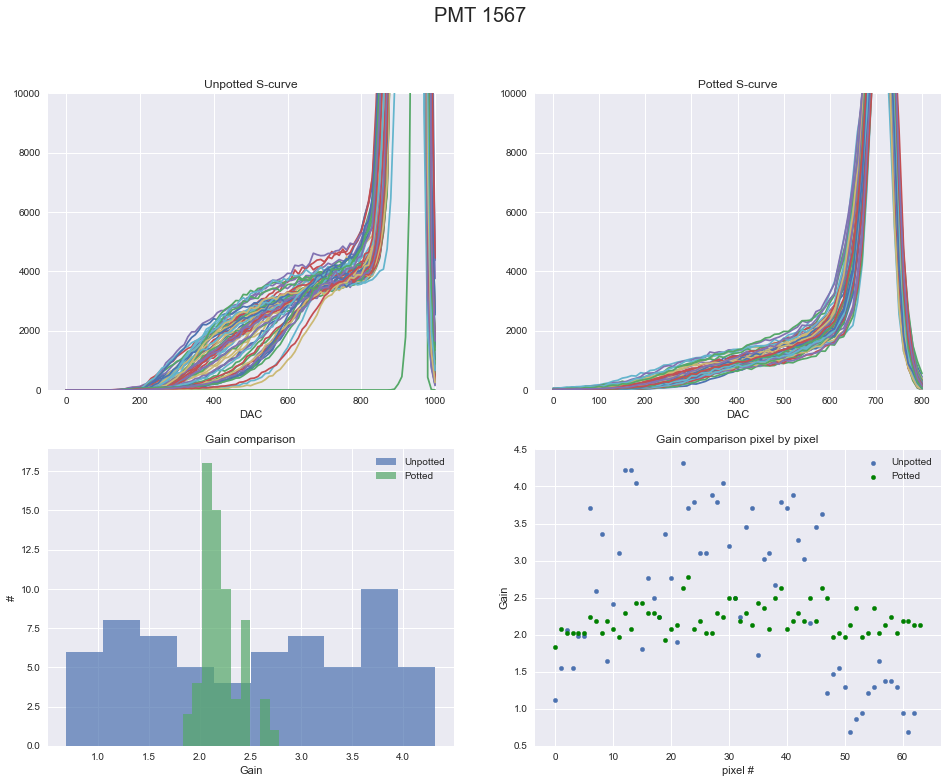

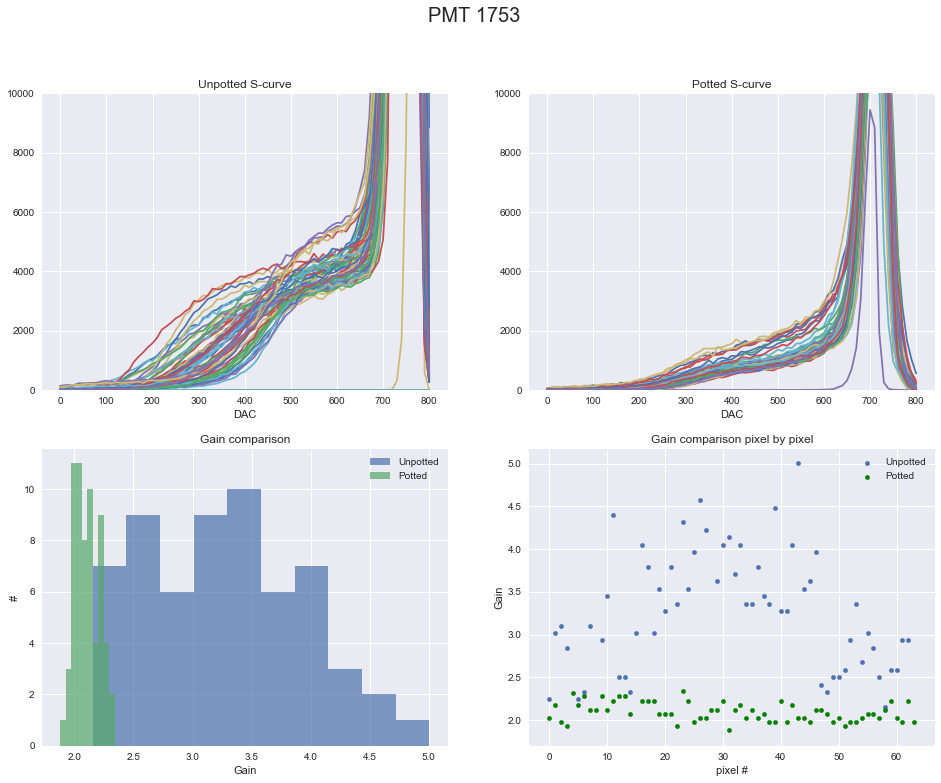

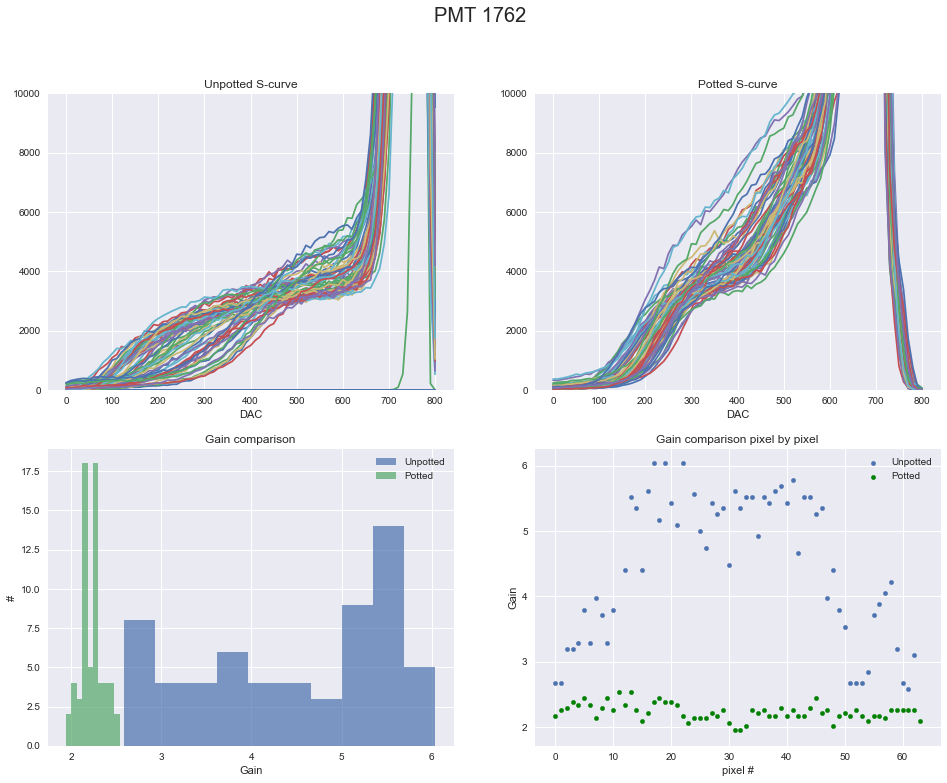

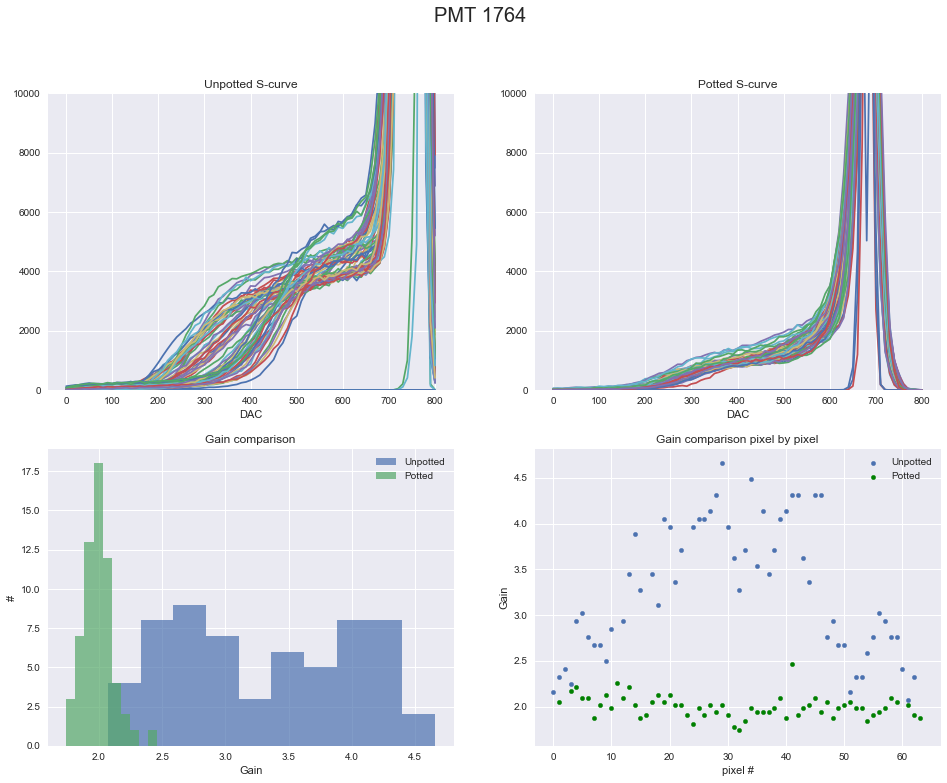

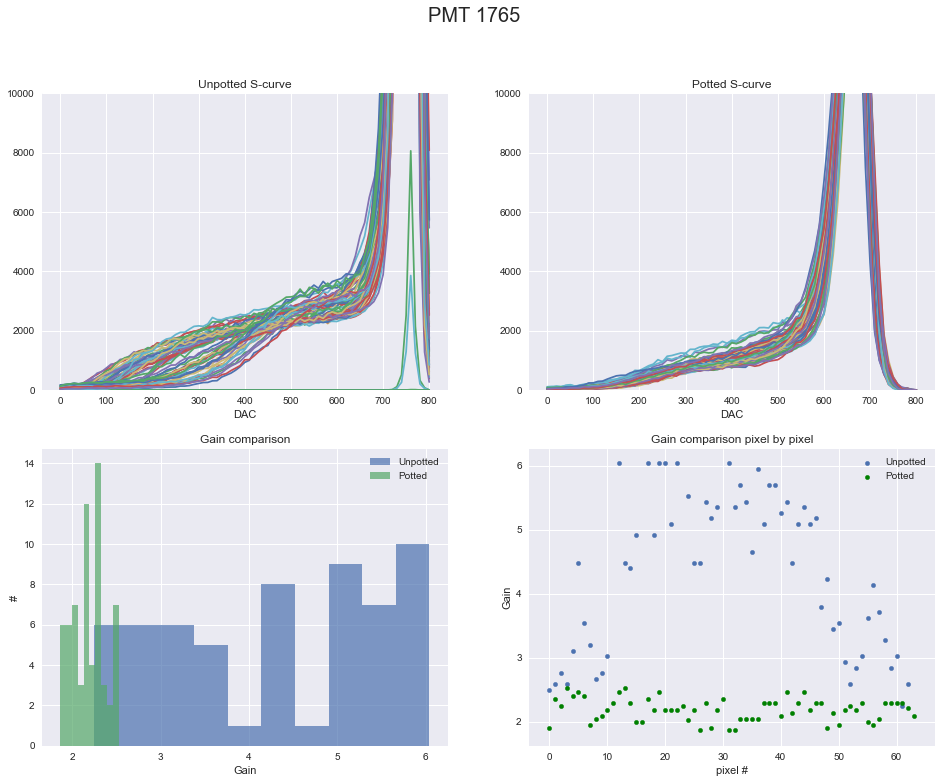

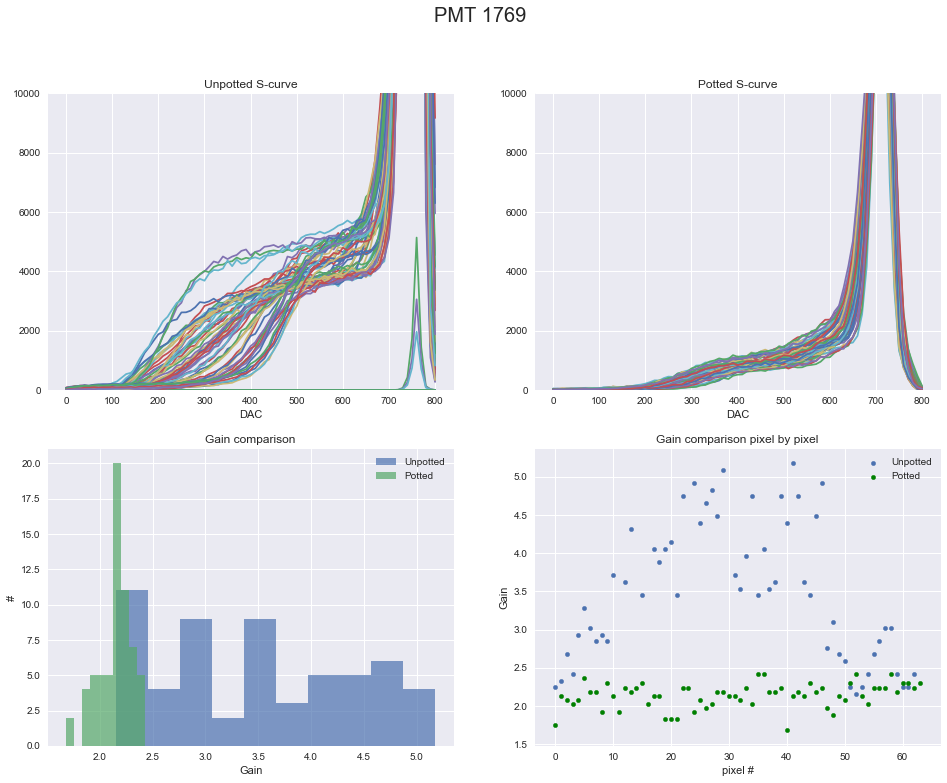

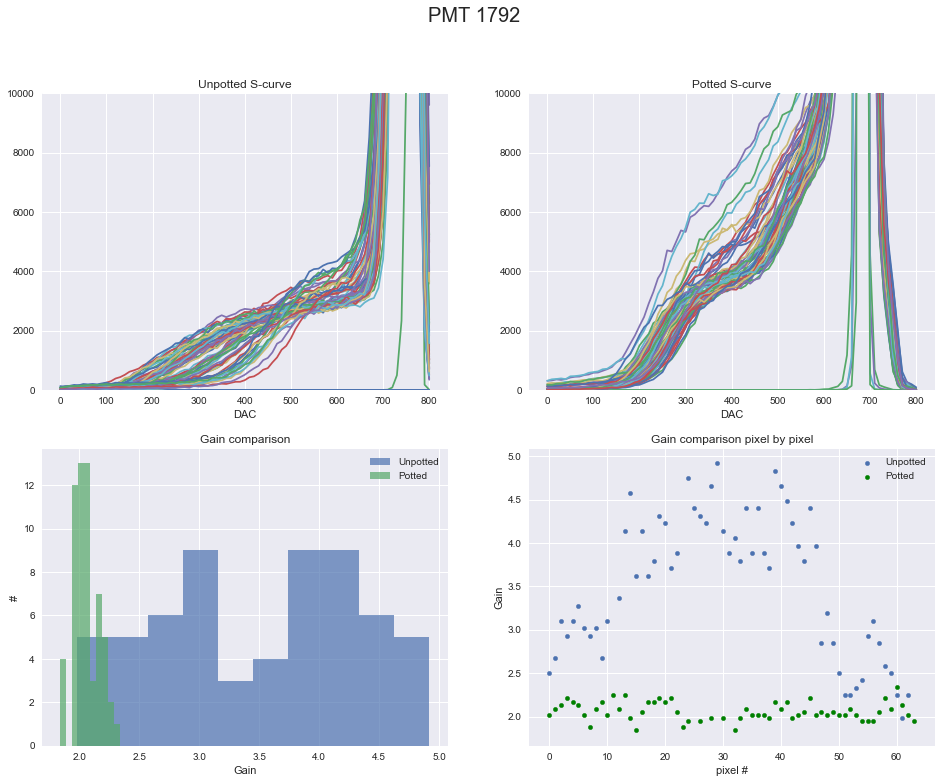

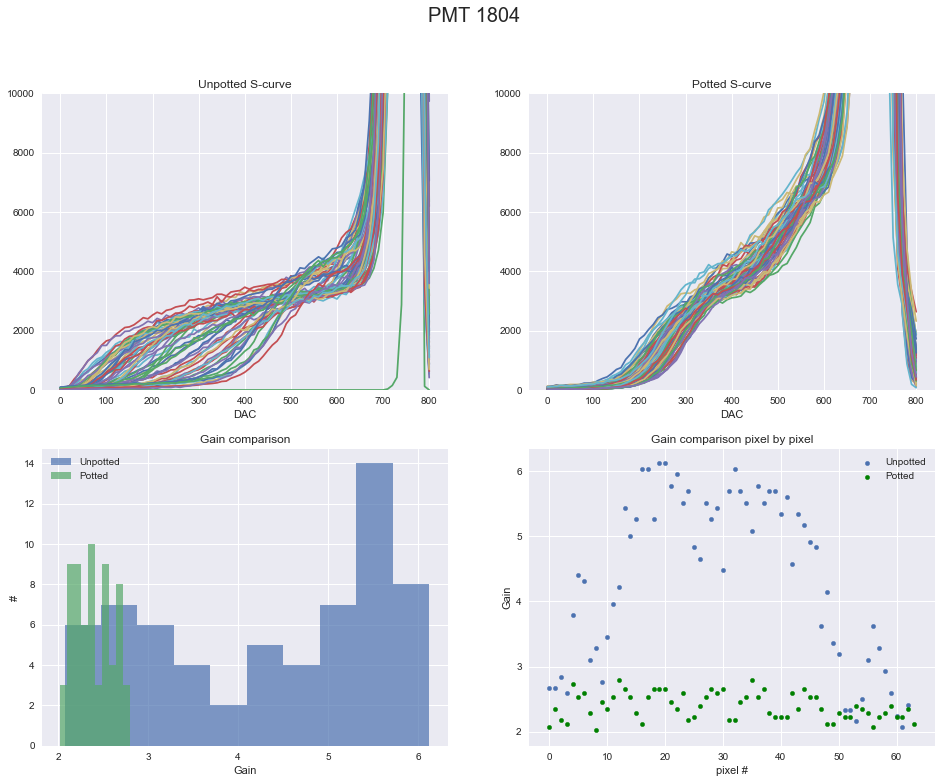

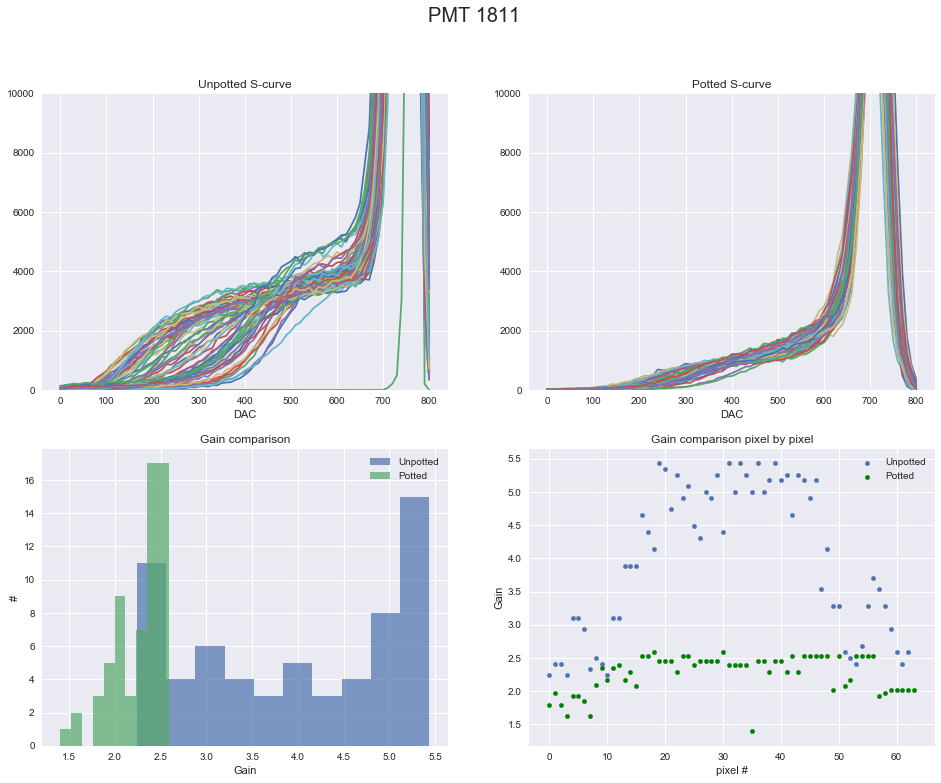

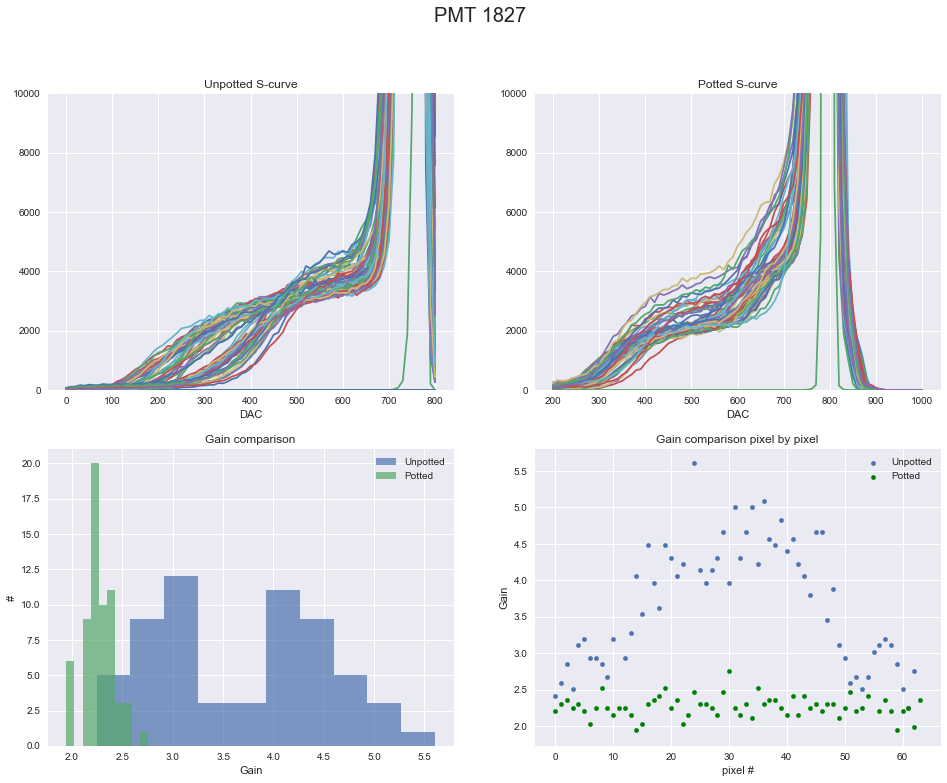

In [30]:
#initialise
pd=[]

#run comparison over all files
for i in range(np.shape(setup)[0]):
    #load fixed config
    PMT=setup[i][0]
    ped=setup[i][1]
    corrfac=setup[i][2]
    k=setup[i][3]
    ASIC=setup[i][4]
    y_lim=10000

    #calculate gains
    gains_before, gains_after, perc_diff = compare(PMT,ped,corrfac,k,ASIC)
    pd.append(perc_diff)

    #plot and save histograms + S-curves
    for file in os.listdir(unpot_data):
        if fnmatch.fnmatch(file,'*'+str(PMT)+'*'):
            unpot=unpot_data+file

            pot=pot_data+'PMT'+str(PMT)+'_potted.txt'

            DAC_PM_unpot, pmt_unpot = pltPMT(unpot)
            DAC_PM_pot, pmt_pot = pltPMT(pot)

            f, axarr = plt.subplots(2,2,figsize=(16,12),facecolor='w',edgecolor='k')
            plt.suptitle('PMT '+str(PMT),size=20)
            axarr[0, 0].plot(DAC_PM_unpot,pmt_unpot)
            axarr[0, 0].set_title('Unpotted S-curve')
            axarr[0, 0].set_ylim([0,y_lim])
            axarr[0, 0].set_xlabel('DAC')
            axarr[0, 1].plot(DAC_PM_pot,pmt_pot)
            axarr[0, 1].set_title('Potted S-curve')
            axarr[0, 1].set_ylim([0,y_lim])
            axarr[0, 1].set_xlabel('DAC')
            axarr[1, 0].hist(gains_before[~np.isnan(gains_before)],label='Unpotted', alpha=0.7)
            axarr[1, 0].hist(gains_after[~np.isnan(gains_after)],label='Potted', alpha=0.7)
            axarr[1, 0].legend()
            axarr[1, 0].set_title('Gain comparison')
            axarr[1, 0].set_xlabel('Gain')
            axarr[1, 0].set_ylabel('#')
            axarr[1, 1].scatter(range(64),gains_before,s=20,label='Unpotted')
            axarr[1, 1].scatter(range(64),gains_after,s=20,c='g',label='Potted')
            axarr[1, 1].legend()
            axarr[1, 1].set_title('Gain comparison pixel by pixel')
            axarr[1, 1].set_xlabel('pixel #')
            axarr[1, 1].set_ylabel('Gain')

            plt.savefig(output_dir+'gain_comp_PMT'+str(PMT)+'.png')

            print('Completed PMT '+str(PMT))